卷积神经网络之激活函数
===

# 1.激活函数的意义
激活函数的目的，是为了在神经网络中引入非线性的因素，使得我们可以任意学习输入和输出之间的复杂变换

# 2.Sigmoid

## 2.1.优点
- 函数$y(x)=\frac{1}{1+e^{-x}}$，优点是输出数据可以映射到$[0,1]$之间,很好。由于输出值限定在0到1，因此它对每个神经元的输出进行了归一化
- 用于将预测概率作为输出的模型。由于概率的取值范围是 0 到 1，因此 Sigmoid 函数非常合适
- 函数是可微的。这意味着可以找到任意两个点的 sigmoid 曲线的斜率
- 明确的预测，即非常接近1或0

## 2.2.缺点
- $y'(x)=y(x)(1-y(x))$。缺点是梯度下降明显，至少减少75%。这是因为$y'$最大值是0.25，如果梯度原来是1，那么1*0.25= 0.25，那么就是梯度损失了1-25%=75%。所以在深度学习中，最后一层可以使用Sigmoid函数。中间层不可使用，因为梯度损失太厉害
- 函数输出不是以0为中心的，这会降低权重更新的效率
- Sigmoid函数执行指数运算，计算机运行得较慢

Text(0.5, 1.0, 'Sigmoid函数的导数函数图像')

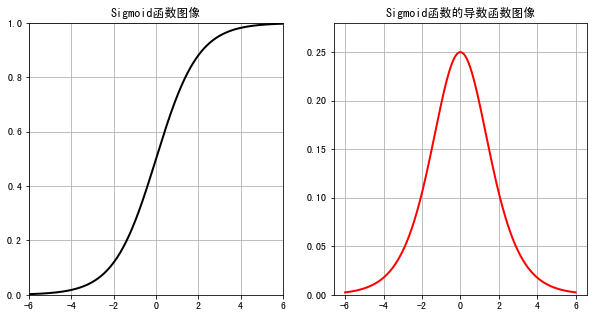

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

x = np.linspace(-6, 6, 1000)
y = 1 / (1 + np.exp(-x))

y1 = y * (1-y)
plt.figure(facecolor='w', figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-6, 6))
plt.ylim((0, 1))
plt.title(u'Sigmoid函数图像')

plt.subplot(1,2,2)
plt.plot(x, y1, linewidth=2, color="red")
plt.grid(True)
plt.ylim((0, 0.28))
plt.title(u'Sigmoid函数的导数函数图像')

# 3.tanh
- 正向看，函数$f(x)=tanh(x)=\frac{1-e^{-2x}}{1+e^{-2x}}=\frac{2}{1+e^{-2x}}-1$，优点是输出数据可以映射到$[-1,1]$
- 反向看，$f'(x)=1-f(x)^2$。最大值为1,也就是说只有f(x)=0的时候，反向梯度才是1，但是正向为0，也就没有什么激励过程了

当输入较大或较小时，输出几乎是平滑的并且梯度较小，这不利于权重更新。二者的区别在于输出间隔，tanh的输出间隔为1，并且整个函数以0为中心，比sigmoid函数更好。注意：在一般的二元分类问题中，tanh函数用于隐藏层，而sigmoid函数用于输出层，但这并不是固定的，需要根据特定问题进行调整。

Text(0.5, 1.0, 'Tanh导数函数图像')

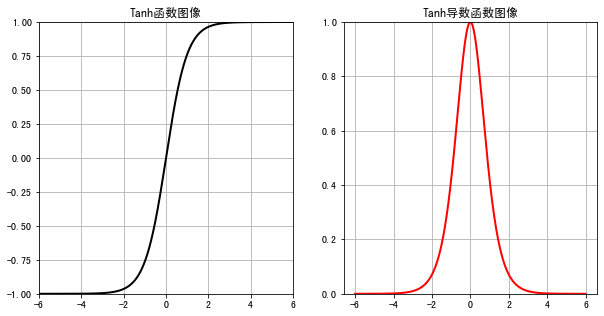

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

x = np.linspace(-6, 6, 1000)
y = (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))

y1 = 1 - y**2
plt.figure(facecolor='w', figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-6, 6))
plt.ylim((-1, 1))
plt.title(u'Tanh函数图像')

plt.subplot(1,2,2)
plt.plot(x, y1, linewidth=2, color="red")
plt.grid(True)
plt.ylim((0, 1))
plt.title(u'Tanh导数函数图像')

# 4.ReLU(Rectified linear unit)
$$
f(x)=\begin{cases}
0 & x \le 0\\\\
x & x \geq 0
\end{cases} f'(x)=\begin{cases}
0 & x \le 0\\\\
1 & x \geq 0
\end{cases}
$$
这个函数正向截断负值，损失大量特征，反向梯度没有损失。由于特征特别多，所以损失一些特征没有关系

## 4.1.优点
- 当输入为正时，不存在梯度饱和问题
- 计算速度快得多。ReLU 函数中只存在线性关系，因此它的计算速度比sigmoid和tanh更快

## 4.2.缺点
- Dead ReLU问题。当输入为负时，ReLU完全失效，在正向传播过程中，这不是问题。有些区域很敏感，有些则不敏感。但是在反向传播过程中，如果输入负数，则梯度将完全为零，sigmoid函数和tanh函数也具有相同的问题
- 我们发现ReLU函数的输出为0或正数，这意味着ReLU函数不是以0为中心的函数

Text(0.5, 1.0, 'ReLU导数函数图像')

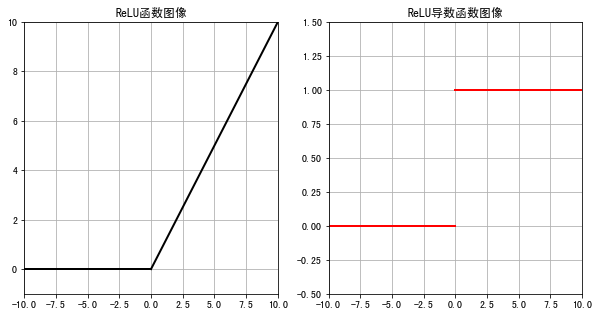

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(10,5))

x = np.linspace(-10, 0, 1000)
y = [0] * 1000

x1 = np.linspace(0, 10, 1000)
y1 = x1
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.plot(x1, y1, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'ReLU函数图像')

y2 = [0] * 1000
y3 = [1] * 1000
plt.subplot(1,2,2)
plt.plot(x, y2, linewidth=2, color="red")
plt.plot(x1, y3, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-0.5, 1.5))
plt.title(u'ReLU导数函数图像')

## 4.2.使用Numpy实现ReLU激活函数

In [ ]:
def forward(self, x, *args, **kwargs):
        self.x = x
        return np.maximum(x, 0)

可以看到，实现很简单

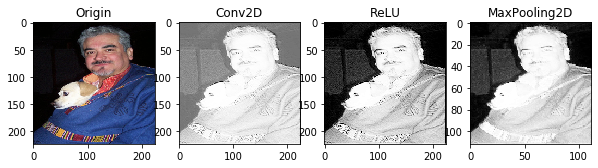

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torchvision.models as models
import torch
from JLib.pyn.layers import Conv2D, MaxPooling, Relu
from JLib.pyn.functions import preprocess_image

plt.figure(figsize=(10,10), facecolor='w')
imagePath = "data/ConvVisible01.jpg"

img = cv2.imread(imagePath)
basicImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
originImg = cv2.resize(basicImage, (224, 224))
plt.subplot(1, 4, 1)
plt.title('Origin')
plt.imshow(originImg)

convImage = np.expand_dims(originImg, axis=0)
conv = Conv2D(convImage.shape, 12, 3, 1, 'SAME')
convImage = conv.forward(convImage) # 这里使用的是初始化权重，还没有进行过迭代
feature = convImage[:, :, :, 0]
feature = np.reshape(feature, newshape=(feature.shape[1], convImage.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1, 4, 2)
plt.title('Conv2D')
plt.imshow(feature, cmap='gray')

relu1 = Relu(convImage.shape)
relu1_img = relu1.forward(convImage)
feature = relu1_img[:, :, :,0]
feature = np.reshape(feature, newshape=(feature.shape[1], feature.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1,4,3)
plt.title('ReLU')
plt.imshow(feature, cmap='gray')

pool1 = MaxPooling(relu1_img.shape, ksize=2, stride=2)
pool_img = pool1.forward(relu1_img)
feature = pool_img[:, :, :,0]
feature = np.reshape(feature, newshape=(feature.shape[1], feature.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1,4,4)
plt.title('MaxPooling2D')
plt.imshow(feature, cmap='gray')

# 5.Leaky ReLU
$$
f(x)=\begin{cases}
0.1x & x \le 0\\\\
x & x \geq 0
\end{cases} f'(x)=\begin{cases}
0.1 & x \le 0\\\\
1 & x \geq 0
\end{cases}
$$
优点是保留更多参数，少量梯度反向传播，这个函数可以解决ReLU函数负值神经元失活的问题。你甚至可以创造自己的激励函数来处理自己的问题, 不过要确保的是这些激励函数必须是可以微分的, 因为在误差反向传递的时候, 只有这些可微分的激励函数才能把误差传递回去。传统神经网络，一般使用Sigmoid或者tanh来做激活函数，而卷积神经网络一般使用ReLU和Leaky ReLU来说激活函数

- Leaky ReLU 通过把 x 的非常小的线性分量给予负输入（0.01x）来调整负值的零梯度（zero gradients）问题；
- Leak 有助于扩大 ReLU 函数的范围，通常 a 的值为 0.01 左右；
- Leaky ReLU 的函数范围是（负无穷到正无穷）。

注意：从理论上讲，Leaky ReLU具有ReLU的所有优点，而且Dead ReLU不会有任何问题，但在实际操作中，尚未完全证明Leaky ReLU总是比ReLU更好

Text(0.5, 1.0, 'Leaky ReLU导数函数图像')

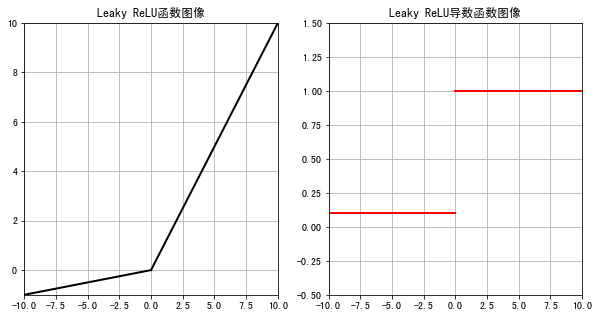

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(10,5))

x = np.linspace(-10, 0, 1000)
y = 0.1 * x

x1 = np.linspace(0, 10, 1000)
y1 = x1
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.plot(x1, y1, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'Leaky ReLU函数图像')

y2 = [0.1] * 1000
y3 = [1] * 1000
plt.subplot(1,2,2)
plt.plot(x, y2, linewidth=2, color="red")
plt.plot(x1, y3, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-0.5, 1.5))
plt.title(u'Leaky ReLU导数函数图像')

# 6.ELU
$$
f(x)=\begin{cases}
\alpha(e^x-1) & x \leq 0 \\
x & x > 0
\end{cases}
$$
导数为
$$
f'(x)=\begin{cases}
f(x) + \alpha \\
1 & x > 0
\end{cases}
$$

显然，ELU 具有 ReLU 的所有优点，并且：
- 没有Dead ReLU问题，输出的平均值接近0，以0为中心；
- ELU通过减少偏置偏移的影响，使正常梯度更接近于单位自然梯度，从而使均值向零加速学习；
- ELU在较小的输入下会饱和至负值，从而减少前向传播的变异和信息。

一个小问题是它的计算强度更高。与Leaky ReLU类似，尽管理论上比ReLU要好，但目前在实践中没有充分的证据表明ELU总是比 ReLU 好

Text(0.5, 1.0, 'ELU导数函数图像')

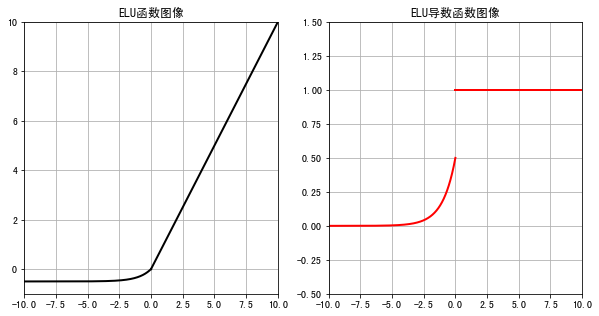

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(10,5))

alpha = 0.5

x = np.linspace(-10, 0, 1000)
y = alpha * (np.exp(x) - 1)

x1 = np.linspace(0, 10, 1000)
y1 = x1
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.plot(x1, y1, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'ELU函数图像')

y2 = y + alpha
y3 = [1] * 1000
plt.subplot(1,2,2)
plt.plot(x, y2, linewidth=2, color="red")
plt.plot(x1, y3, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-0.5, 1.5))
plt.title(u'ELU导数函数图像')

# 7.Mish激活函数
$$Mish=x * tanh(ln(1+e^x))$$

## 7.1.Mish实现

In [1]:
import torch

class Mish(torch.nn.Module):
    def __init__(self):
        super(self, Mish).__init__()
    
    def forward(self, x):
        x = x * (torch.tanh(torch.nn.functional.softplus(x)))
        return x

Text(0.5, 1.0, 'Mish函数图像')

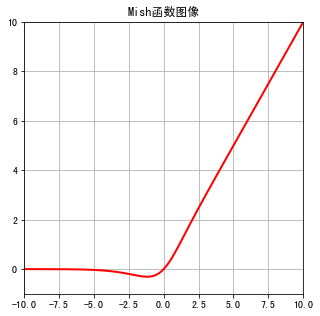

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(5,5))

x = np.linspace(-10, 10, 1000)
y = 1 + np.exp(x)
y = np.log(y)
y = np.tanh(y)
y = x * y

plt.subplot(1,1,1)
plt.plot(x, y, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'Mish函数图像')

# 8.Softmax激活函数
Softmax是用于多类分类问题的激活函数，在多类分类问题中，超过两个类标签则需要类成员关系。对于长度为 K 的任意实向量，Softmax可以将其压缩为长度为K，值在（0，1）范围内，并且向量中元素的总和为1的实向量。

![Images](images/05_05_001.png)

Softmax 与正常的 max 函数不同：max 函数仅输出最大值，但 Softmax 确保较小的值具有较小的概率，并且不会直接丢弃。我们可以认为它是 argmax 函数的概率版本或「soft」版本。Softmax 函数的分母结合了原始输出值的所有因子，这意味着 Softmax 函数获得的各种概率彼此相关。

缺点：
- 在零点不可微；
- 负输入的梯度为零，这意味着对于该区域的激活，权重不会在反向传播期间更新，因此会产生永不激活的死亡神经元。